In [21]:
import numpy as np
import matplotlib.pyplot as plt
import control as ct

## Modelagem 
<center>
<div class=figure >
<img src =" utils/mass_dumper.png"
width= 300> 
<p>Figura 1 - Sistema.</p>
</div>
<center>



$$
\begin{align}
m \ddot{x} = F(t)- c \dot{x}
\end{align}
 \\
\vec{\dot{x}}=\begin{bmatrix}
x(t)\\ \dot{x}(t) 

\end{bmatrix}, \;\;\;\;\;\;\;\;\; \vec{u} = [F(t)]
 \\\\
 \vec{\dot{x}}=\begin{bmatrix}
0 & 1\\ 0 & -c/m 
\end{bmatrix}
$$


In [24]:
# Definindo o sistema
m = 1 # Massa
c = 0.2 # Coeficiente

A = np.array([[0,1],[0, -c/m]])
B = np.array([[0],[1/m]])
C = np.array([[1,0],[0, -1]])
D = 0
print(B)

[[0.]
 [1.]]


## Resolvendo o prblema de Otimização

Solução para $(\rho)$:
$$
\begin{align*}
min \;J = \int_{0}^{\infty } \vec{x}^T Q\vec{x}+\vec{u}^T R\vec{u} dt
\end{align*}
$$
Sujeito a :
$$
\begin{align*}
\vec{\dot{x}} = A\vec{x}+B\vec{u}
 \\
\vec{u}(t) = -K \vec{x}(t) 
\end{align*}
$$
Onde: 
$$
\begin{align*}
K = R^{-1} B^T S 
\end{align*}
$$
Onde S é a solução algébrica da Equação de Ricatti: 
$$
\begin{align*}
A^T S + AS -S B R^{-1}B^TS + Q = 0
\end{align*}
$$
<center>
<div class=figure >
<img src =" utils/BD-LQR.png"
width= 300> 
<p>Figura 2 - Diagrama de blocos LQR.</p>
</div>
<center>

Algoritmo para o LQR:

$1-$ Inserir matrizes A e B

$2-$ Escolher as matrizes Q e R 

$3-$ Resolver as Equações algébricas de Ricatti 

$4-$ Computar $ K = R^{-1}B^T S$

$5-$ Escolher a solução K que estabiliza o sistema.

In [18]:
Q = np.array([[1,1],[0,1]])
R = np.array([0.01])
R

array([0.01])

In [22]:
# Escolhendo Q e R
""" Cenário 1: O controle é barato (menos custo)
        Cenário 2: O controle é caro (maior custo)
        Cenário 3: Ignora o valor que custa a posição  (despreocupado com custos)
"""
cenario = 1

if cenario == 1:
        Q = np.array([[1,0],[0,1]])
        R = np.array([0.01])
        
elif cenario == 2:
        Q = np.array([[1,0],[0,1]])
        R = np.array([1000])
elif cenario == 3:
        Q = np.array([[0.001,0],[0,10]])
        R = np.array([1])
else:
        print('Método desconhecido')
        


[K,S,E] = ct.lqr(A,B,Q,R)

print('K computado via LQR: ', K)

K computado via LQR:  [[10.         10.75627674]]


In [29]:
#controlador Lqr
Ac = A - B*K
Bc = B
Cc = C
Dc = D
Wip = ct.ss(Ac, Bc, Cc, Dc)

# Condições iniciais:
x0 = np.array([[np.pi],[2]])
t = np.linspace(0, 25, 1000)
t,y = ct.initial_response(Wip, t,x0)
s,p = ct.step_response(Wip)

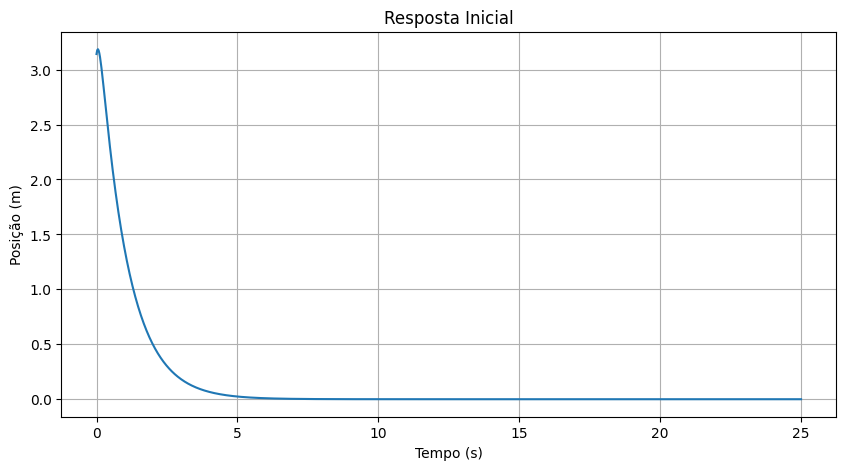

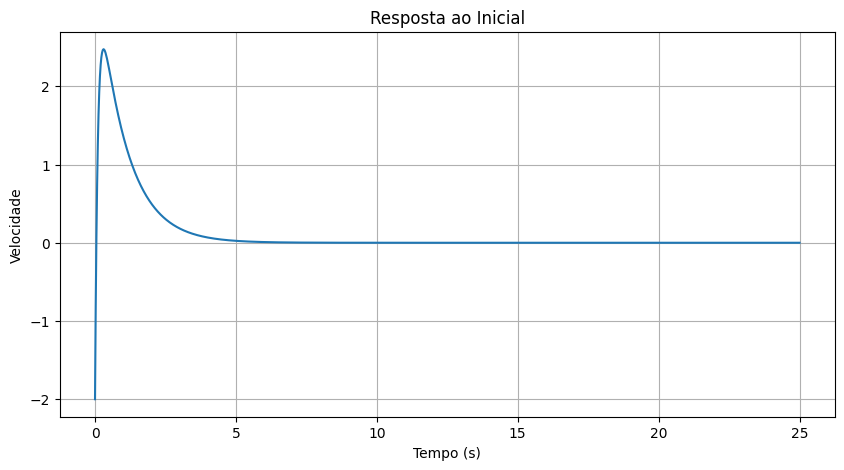

ValueError: operands could not be broadcast together with shapes (1,2) (1000,) 

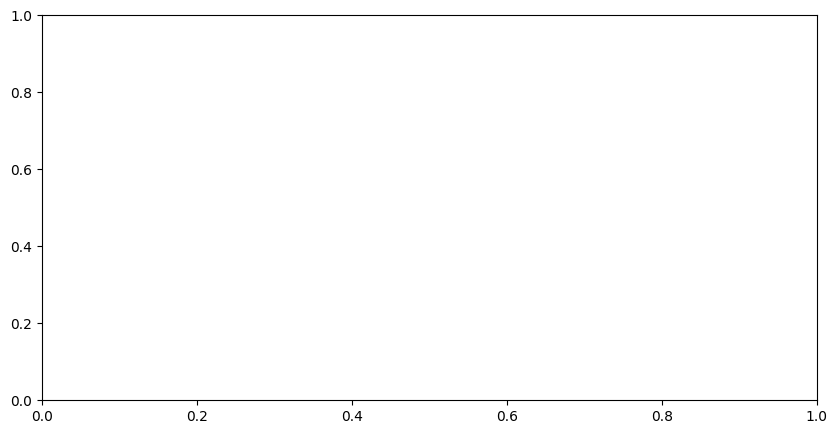

In [36]:
subplots = plt.subplots(1, 1, figsize=(10, 5))
subplots[1].plot(t,y[0], label='x')
subplots[1].set_title('Resposta Inicial')
subplots[1].set_xlabel('Tempo (s)')
subplots[1].set_ylabel('Posição (m)')
subplots[1].grid(True)
plt.show()


subplots = plt.subplots(1, 1, figsize=(10, 5))
subplots[1].plot(t,y[1], label='psi')
subplots[1].set_title('Resposta ao Inicial')
subplots[1].set_xlabel('Tempo (s)')
subplots[1].set_ylabel('Velocidade')
subplots[1].grid(True)
plt.show()

